## Credit Risk Analytics – Identifying Drivers of Loan Default

## Task 1: Data Collection & Understanding

### 1. Check Available Sheet Names

In [46]:
import pandas as pd

xls = pd.ExcelFile("Bank_Personal_Loan_Modelling.xlsx")
print(xls.sheet_names)

['Description', 'Data']


### 2. Load the Correct Sheet

In [72]:
df = pd.read_excel(xls, sheet_name="Data", engine="openpyxl")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [76]:
print("Shape:", df.shape)
df.info()

Shape: (5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 3. Feature Type Classification

In [83]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile("Bank_Personal_Loan_Modelling.xlsx")
df = pd.read_excel(xls, sheet_name="Data", engine="openpyxl")

# Define feature types
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family']
categorical_features = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
target_variable = 'Personal Loan'
ignored_features = ['ID', 'ZIP Code']

# Print the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Target Variable:", target_variable)
print("Ignored Features:", ignored_features)

Numerical Features: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family']
Categorical Features: ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Target Variable: Personal Loan
Ignored Features: ['ID', 'ZIP Code']


In [85]:
feature_types = {
    'numerical': numerical_features,
    'categorical': categorical_features,
    'target': target_variable,
    'ignored': ignored_features
}

# Example: Accessing all features excluding target & ignored
all_features = numerical_features + categorical_features
print("All Features for Modeling:", all_features)

All Features for Modeling: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


## Task 2: Data Cleaning

### 1. Handle Missing Values

In [97]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### 2. Handle Outliers (e.g., Negative Experience)

In [100]:
(df['Experience'] < 0).sum()

52

#### Replace with median:

In [105]:
# Check for negative experience values
print(df[df['Experience'] < 0])

# Replace negative values with median of positive experience
median_exp = df[df['Experience'] >= 0]['Experience'].median()
df['Experience'] = df['Experience'].apply(lambda x: median_exp if x < 0 else x)

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [107]:
# Check unique values in Education
print(df['Education'].value_counts())

# If 'Education' is in text form, you can encode it
# If it's already in numeric form like 1, 2, 3, this step can be skipped
education_map = {'Undergrad': 0, 'Graduate': 1, 'Advanced/Professional': 2}
df['Education'] = df['Education'].map(education_map)

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64


In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Income', 'Mortgage']] = scaler.fit_transform(df[['Income', 'Mortgage']])

## Task 3: Exploratory Data Analysis (EDA)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

First 5 rows:
   ID  Age  Experience

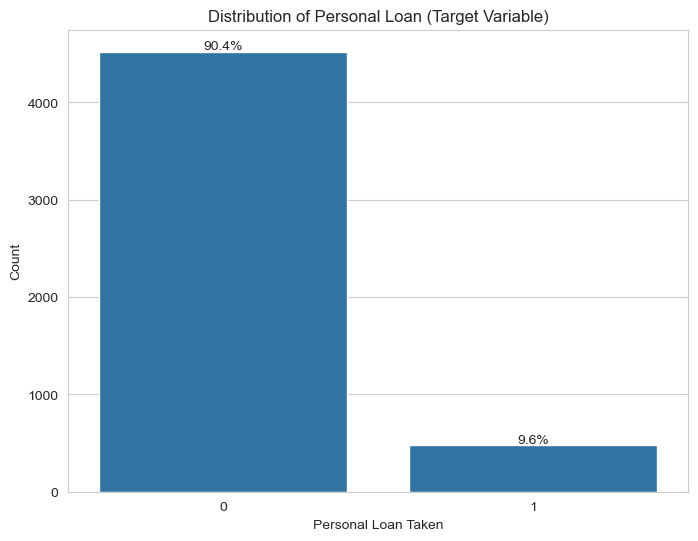

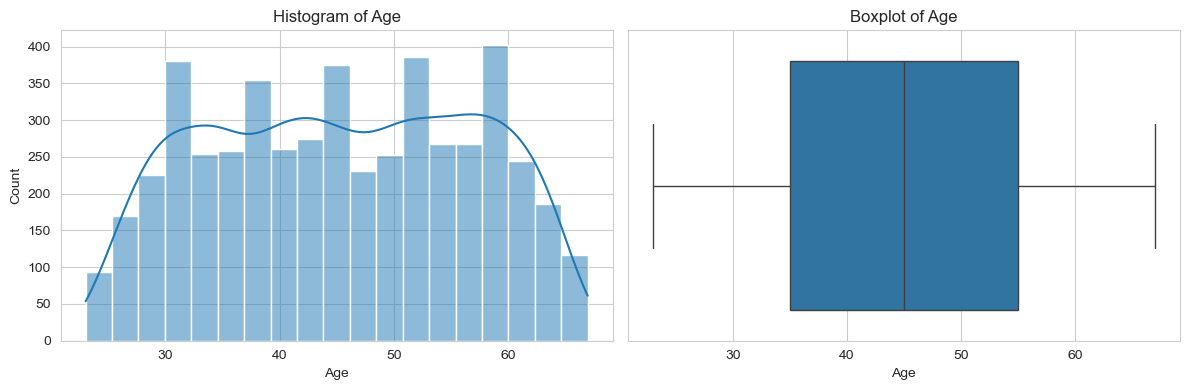

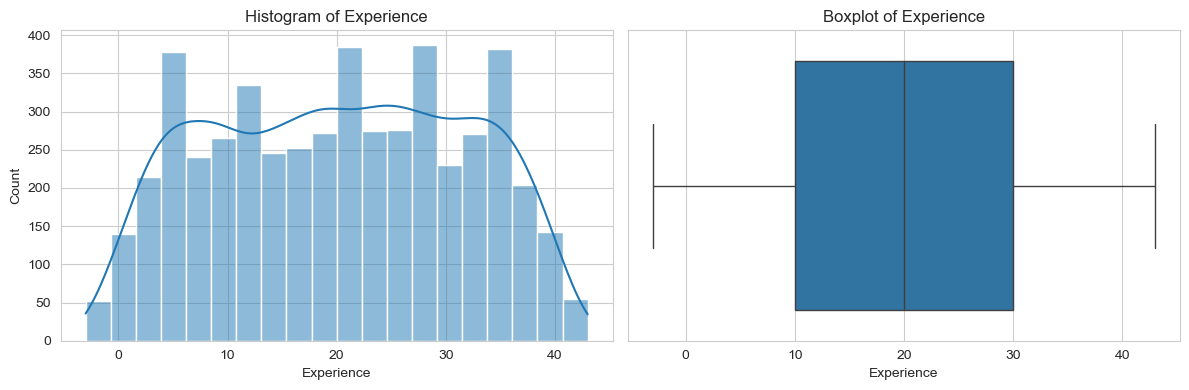

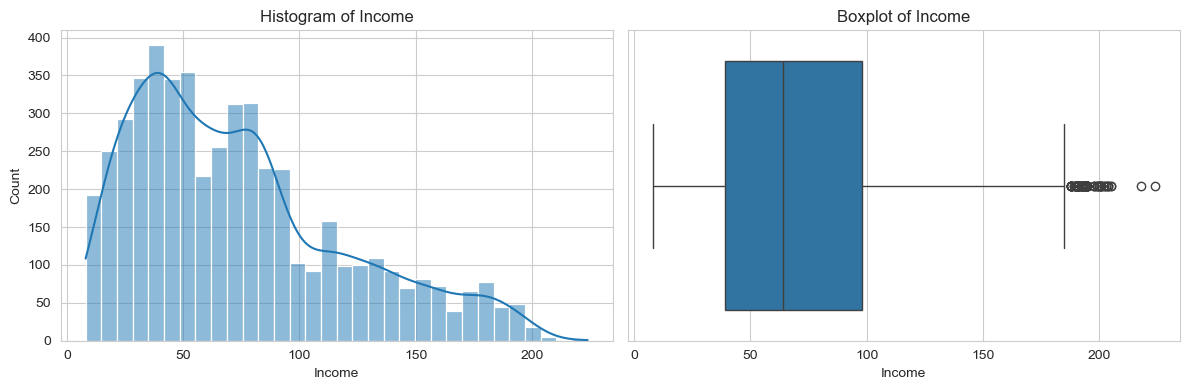

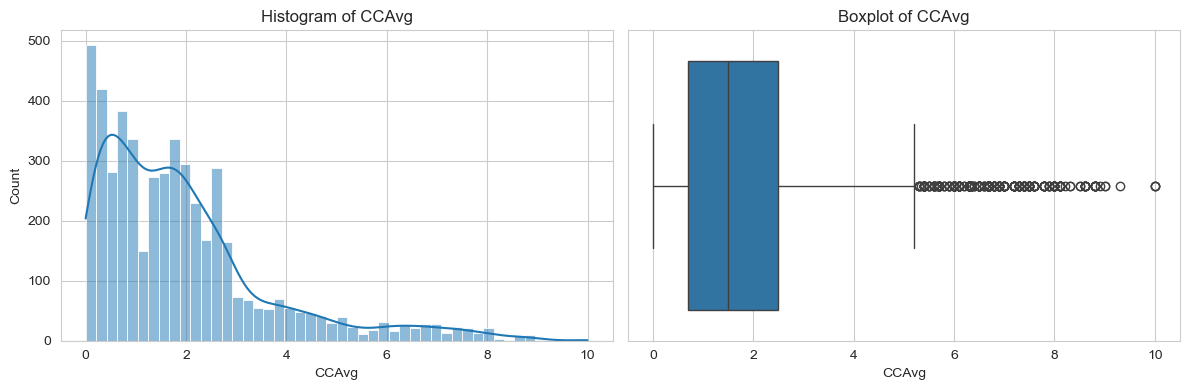

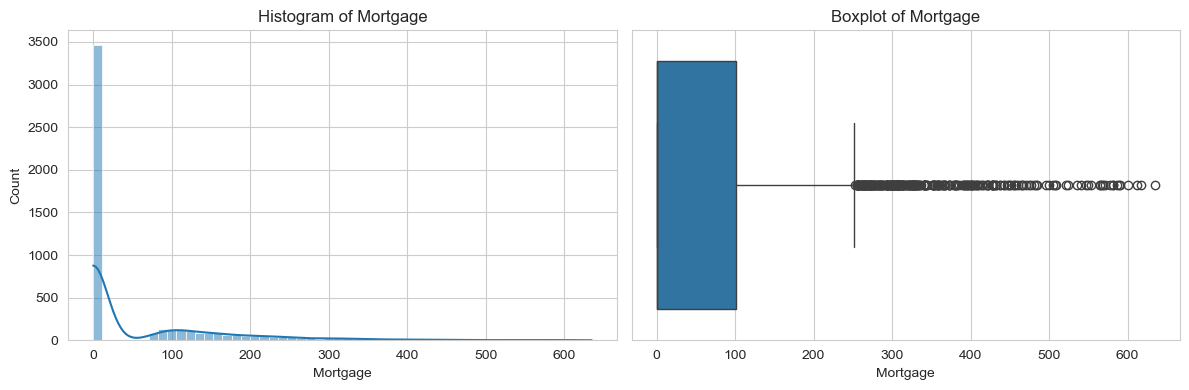

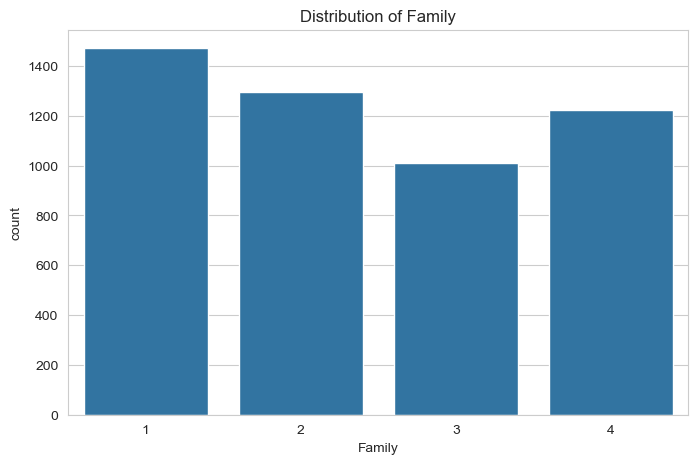

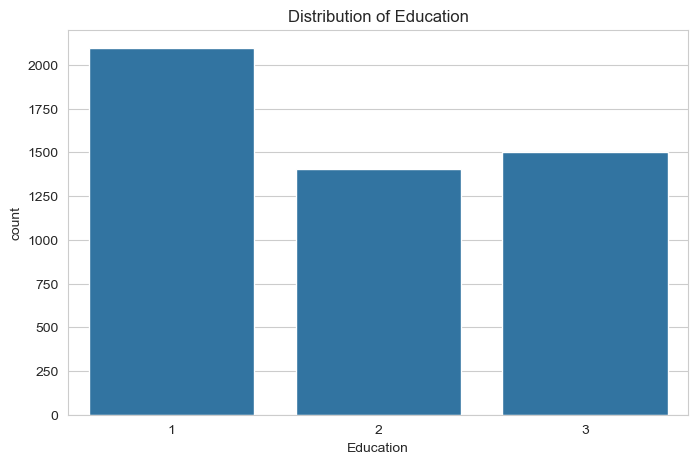

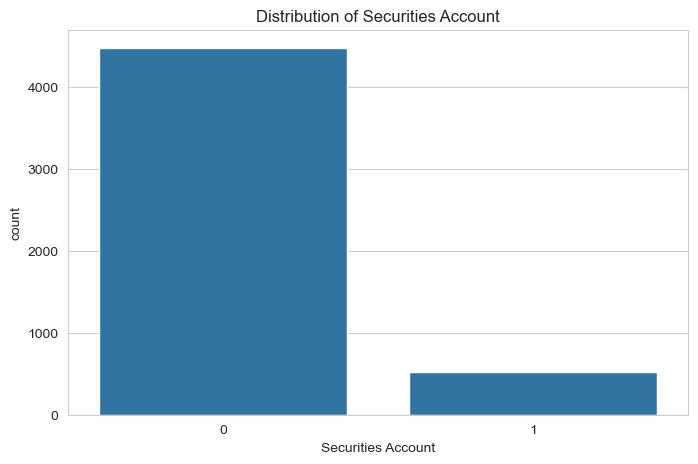

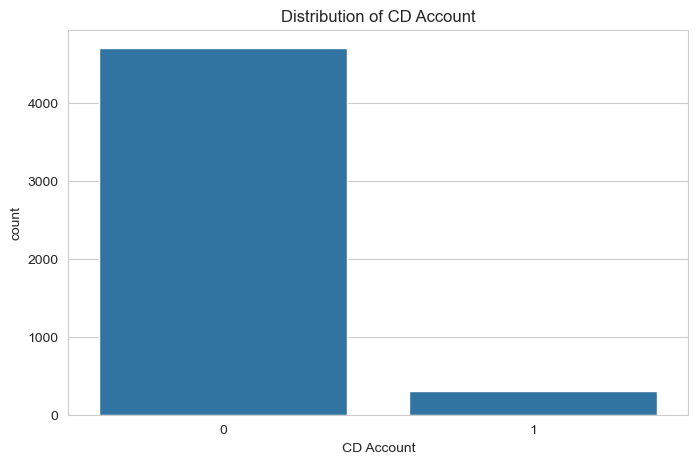

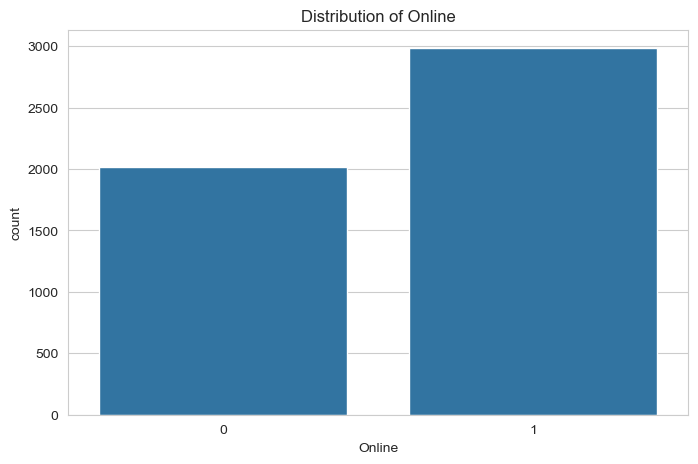

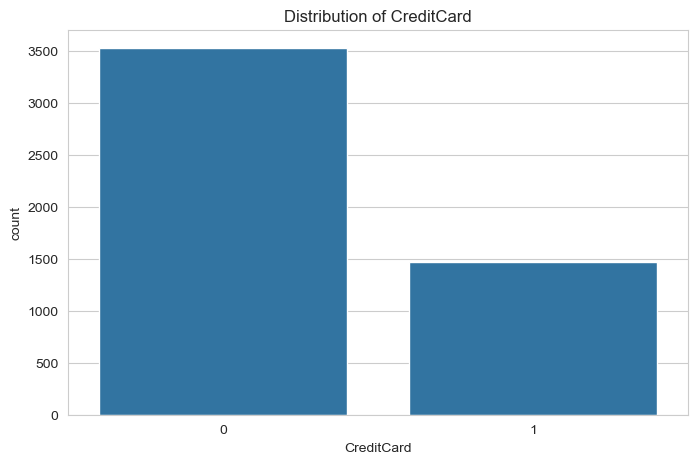

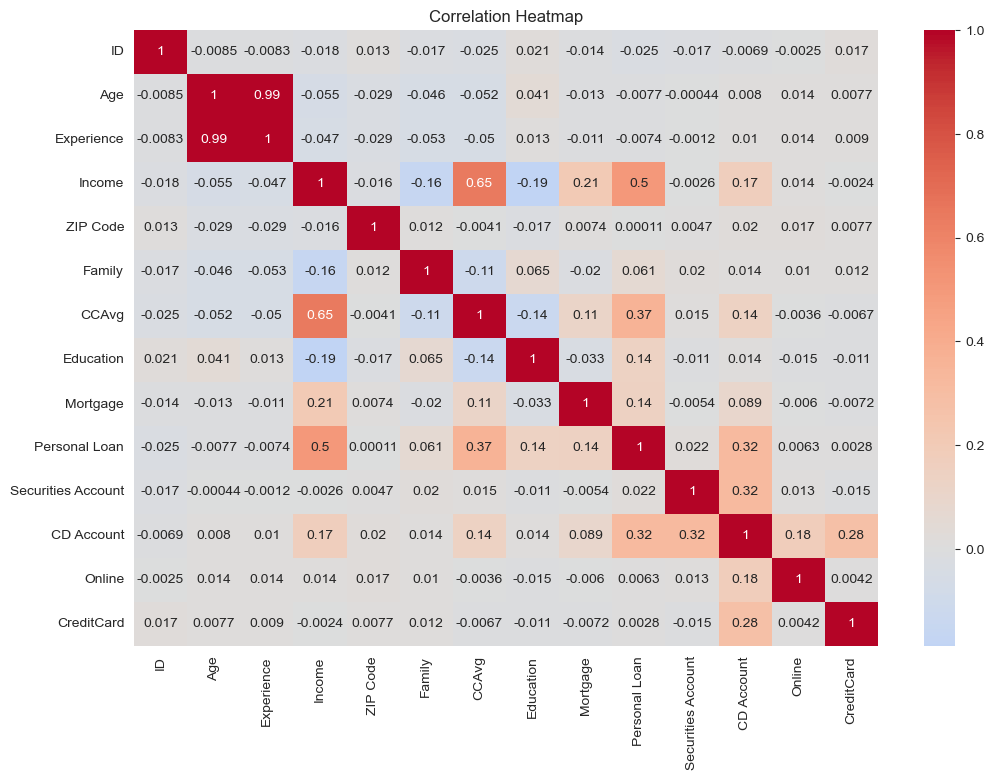

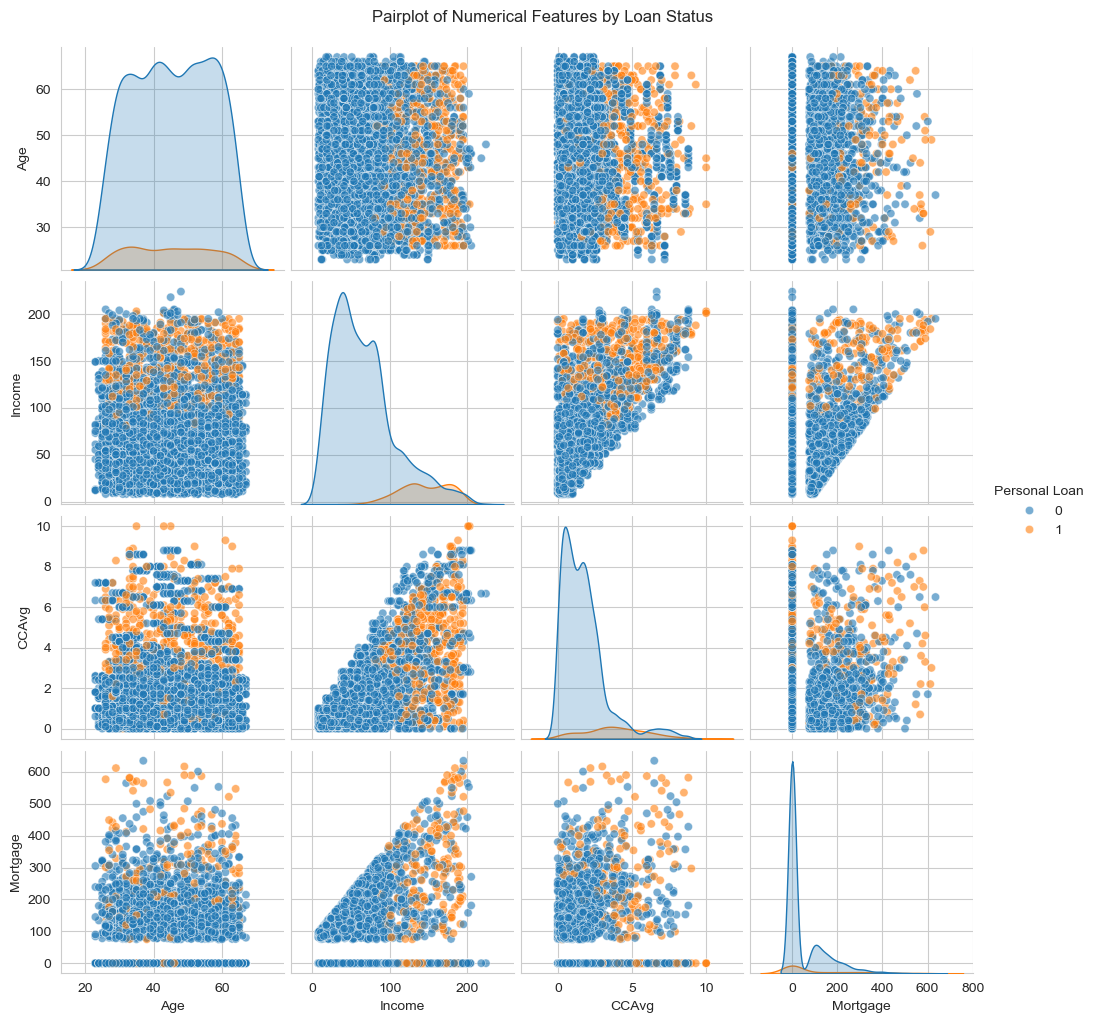

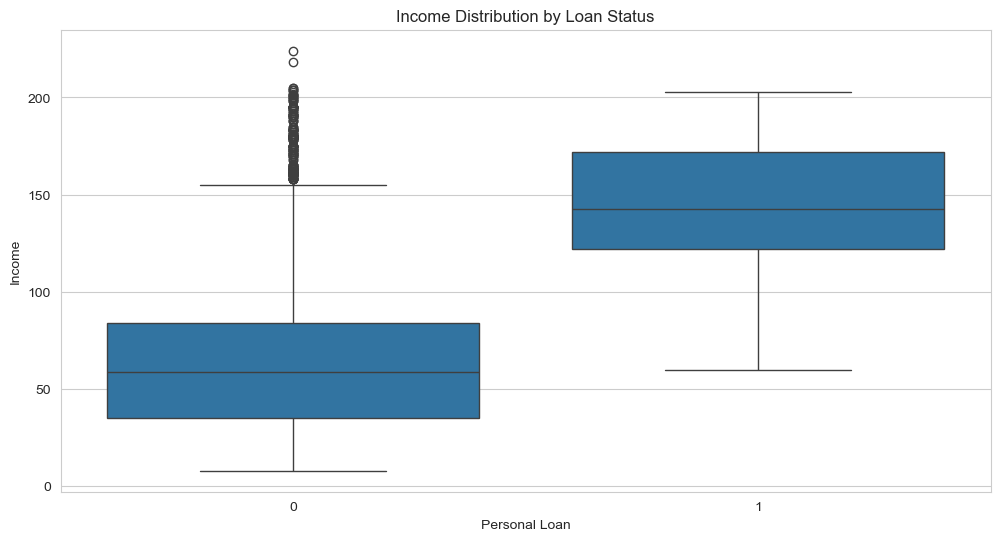

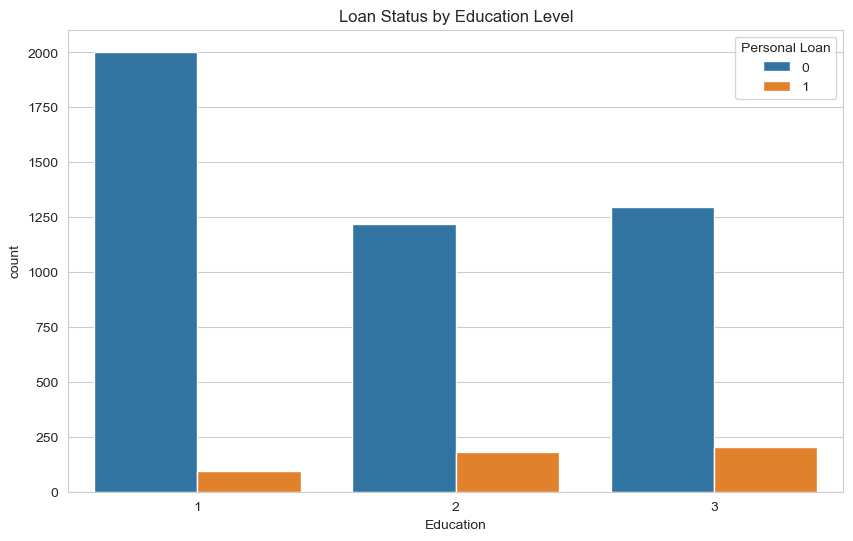

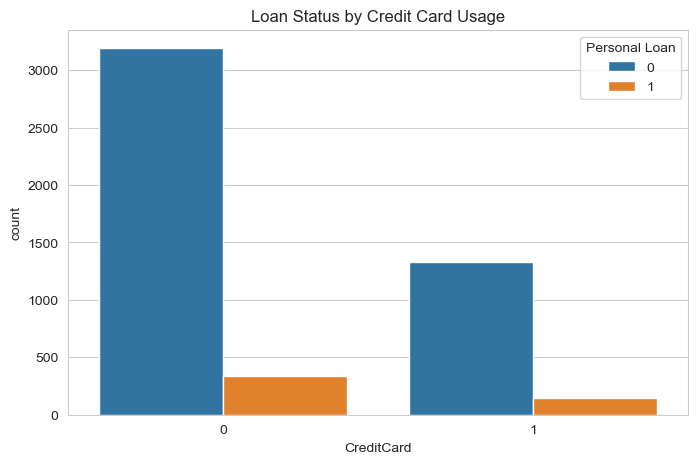

In [120]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)  # Assuming data is in Sheet2

# Display basic info
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe().transpose())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Target variable distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Personal Loan', data=df)
plt.title('Distribution of Personal Loan (Target Variable)')
plt.xlabel('Personal Loan Taken')
plt.ylabel('Count')

# Add percentages to the plot
total = len(df['Personal Loan'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Distribution of numerical features
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in numerical_features:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    
    plt.tight_layout()
    plt.show()

# Distribution of categorical features
categorical_features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected numerical features (subset for better visualization)
sns.pairplot(df[['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']], 
             hue='Personal Loan', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Features by Loan Status', y=1.02)
plt.show()

# Income vs Loan Taken with other dimensions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Personal Loan', y='Income', data=df)
plt.title('Income Distribution by Loan Status')
plt.show()

# Education vs Loan Taken
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Personal Loan', data=df)
plt.title('Loan Status by Education Level')
plt.show()

# Credit card usage vs Loan Taken
plt.figure(figsize=(8, 5))
sns.countplot(x='CreditCard', hue='Personal Loan', data=df)
plt.title('Loan Status by Credit Card Usage')
plt.show()

## Task 4: Correlation & Key Drivers

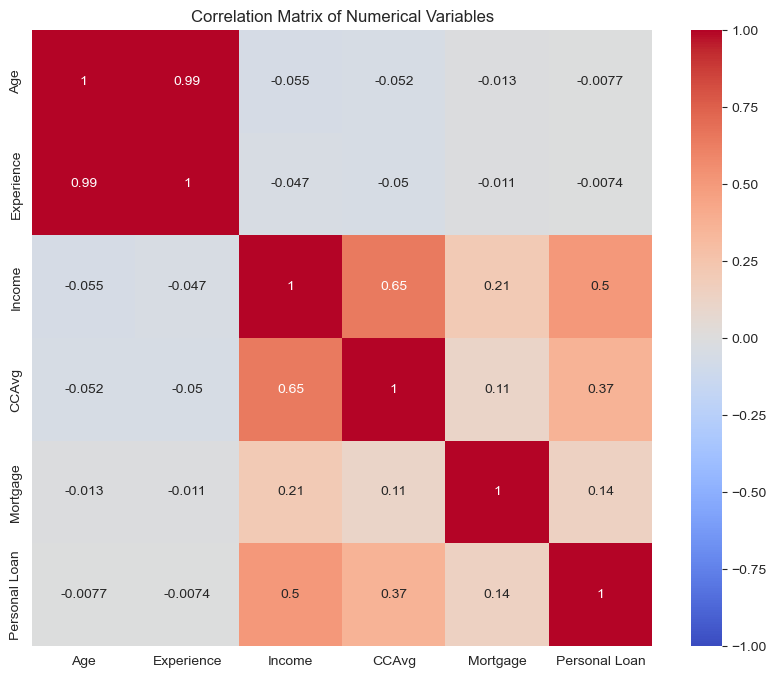


Correlation with Personal Loan (target):
Income        0.502462
CCAvg         0.366891
Mortgage      0.142095
Experience   -0.007413
Age          -0.007726
Name: Personal Loan, dtype: float64

Chi-squared Test Results (categorical vs target):
             Variable  Chi-square        p-value  Significant
3          CD Account  495.904242  7.398298e-110         True
1           Education  111.239872   6.991474e-25         True
0              Family   29.676116   1.614412e-06         True
2  Securities Account    2.172311   1.405150e-01        False
4              Online    0.156007   6.928600e-01        False
5          CreditCard    0.021144   8.843861e-01        False


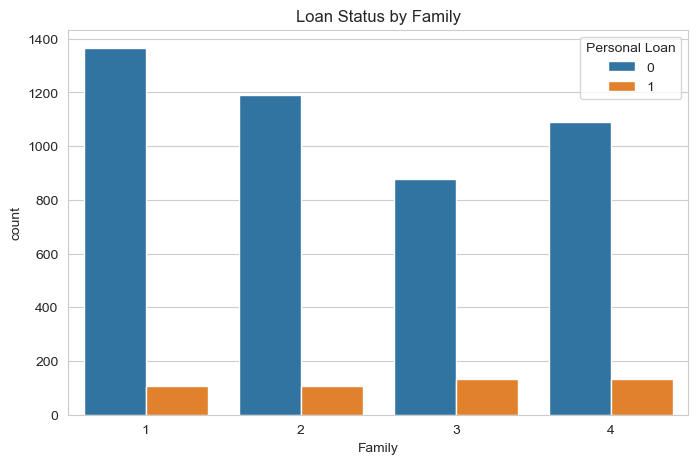

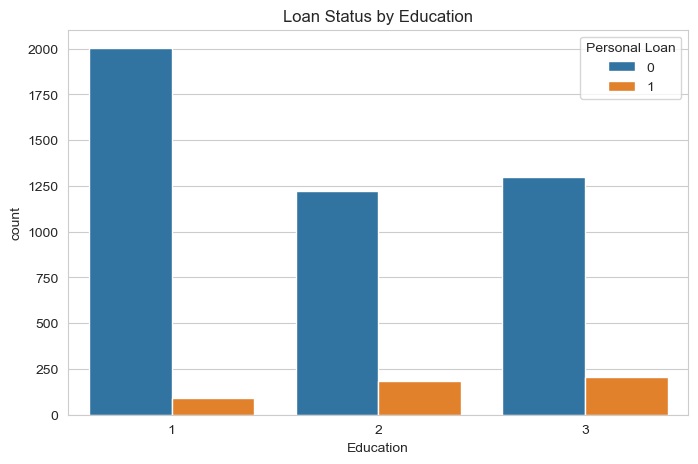

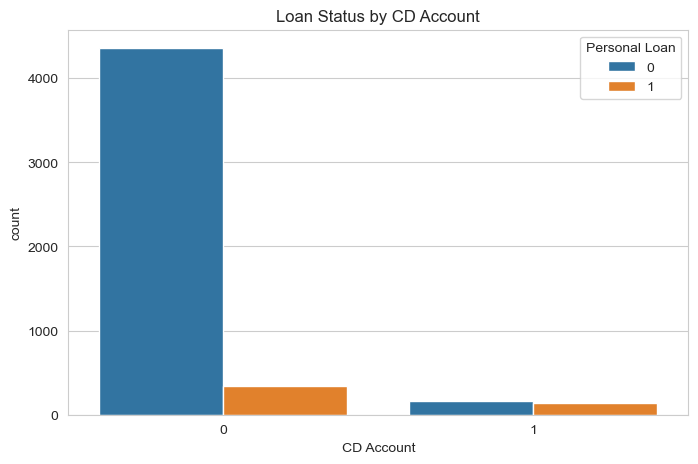


ANOVA Results (numerical vs target):
     Variable  F-statistic        p-value  Significant
2      Income  1688.004580  3.560291e-318         True
3       CCAvg   777.421811  3.815684e-159         True
4    Mortgage   102.994466   5.730342e-24         True
0         Age     0.298324   5.849593e-01        False
1  Experience     0.274675   6.002359e-01        False

Tukey HSD Test for Income:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  78.5084   0.0 74.7623 82.2546   True
---------------------------------------------------


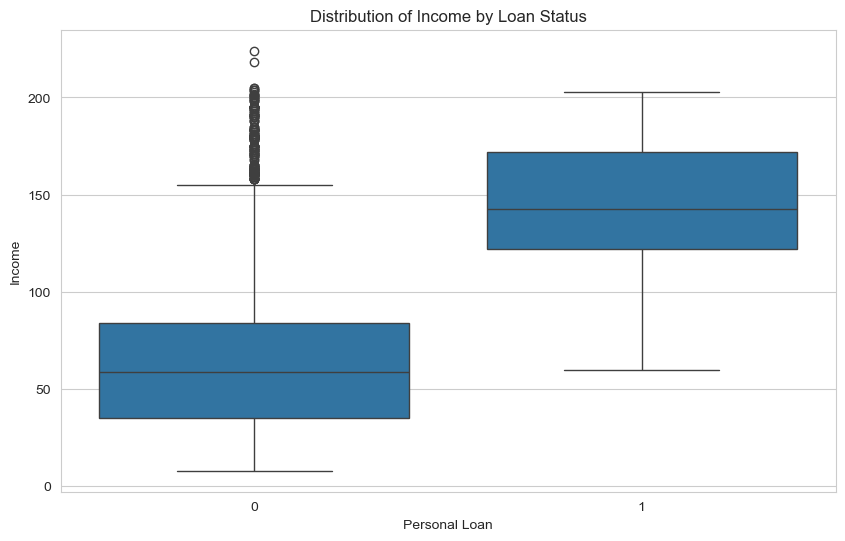


Tukey HSD Test for CCAvg:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   2.1764   0.0 2.0233 2.3294   True
-------------------------------------------------


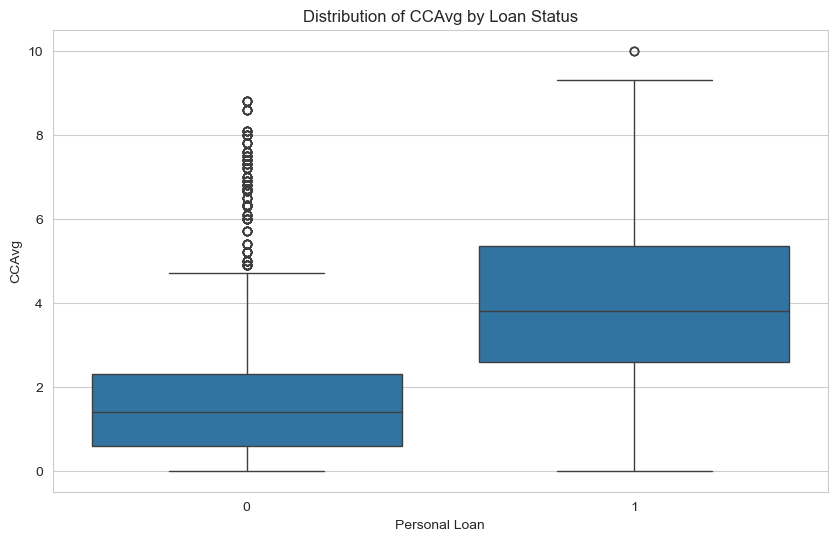


Tukey HSD Test for Mortgage:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  49.0565   0.0 39.5801 58.5328   True
---------------------------------------------------


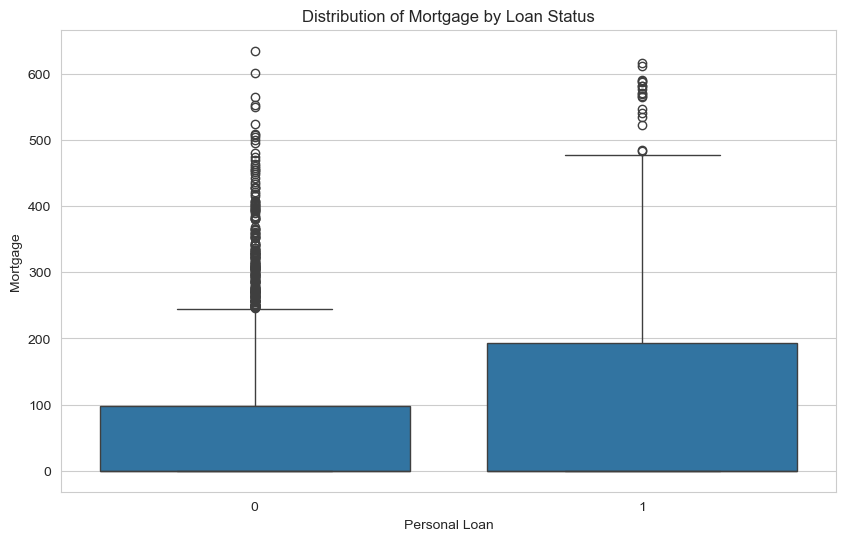


=== KEY DRIVERS OF LOAN DEFAULT ===

Top Numerical Drivers (by correlation magnitude):
Income        0.502462
CCAvg         0.366891
Mortgage      0.142095
Age           0.007726
Experience    0.007413
Name: Personal Loan, dtype: float64

Top Categorical Drivers (by Chi-square significance):
             Variable  Chi-square
3          CD Account  495.904242
1           Education  111.239872
0              Family   29.676116
2  Securities Account    2.172311
4              Online    0.156007


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)

## 1. Correlation Matrix for Numerical Variables
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']

plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Highlight top correlations with target
target_corr = corr_matrix['Personal Loan'].sort_values(ascending=False)
print("\nCorrelation with Personal Loan (target):")
print(target_corr.drop('Personal Loan'))

## 2. Chi-squared Tests for Categorical Variables
categorical_vars = ['Family', 'Education', 'Securities Account', 'CD Account', 
                   'Online', 'CreditCard']

print("\nChi-squared Test Results (categorical vs target):")
results = []
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Personal Loan'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'Variable': var,
        'Chi-square': chi2,
        'p-value': p,
        'Significant': p < 0.05
    })
    
chi2_results = pd.DataFrame(results)
print(chi2_results.sort_values('p-value'))

# Visualize significant categorical relationships
sig_cats = chi2_results[chi2_results['Significant']]['Variable']
for var in sig_cats:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='Personal Loan', data=df)
    plt.title(f'Loan Status by {var}')
    plt.show()

## 3. ANOVA for Numerical Variables vs Target
print("\nANOVA Results (numerical vs target):")
anova_results = []
for var in numerical_vars[:-1]:  # Exclude target
    grouped_data = [df[var][df['Personal Loan'] == group] for group in [0, 1]]
    f_stat, p_val = f_oneway(*grouped_data)
    anova_results.append({
        'Variable': var,
        'F-statistic': f_stat,
        'p-value': p_val,
        'Significant': p_val < 0.05
    })
    
anova_df = pd.DataFrame(anova_results)
print(anova_df.sort_values('p-value'))

# Post-hoc Tukey test for significant variables
sig_numerical = anova_df[anova_df['Significant']]['Variable']
for var in sig_numerical:
    print(f"\nTukey HSD Test for {var}:")
    tukey = pairwise_tukeyhsd(endog=df[var],
                             groups=df['Personal Loan'],
                             alpha=0.05)
    print(tukey)
    
    # Visualize distributions
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Personal Loan', y=var, data=df)
    plt.title(f'Distribution of {var} by Loan Status')
    plt.show()

## 4. Key Drivers Summary
print("\n=== KEY DRIVERS OF LOAN DEFAULT ===")

# Top numerical drivers
print("\nTop Numerical Drivers (by correlation magnitude):")
print(target_corr.drop('Personal Loan').abs().sort_values(ascending=False).head(5))

# Top categorical drivers
print("\nTop Categorical Drivers (by Chi-square significance):")
print(chi2_results.sort_values('Chi-square', ascending=False).head(5)[['Variable', 'Chi-square']])

## Task 5: Predictive Modeling


=== LOGISTIC REGRESSION ===

Accuracy: 0.896
ROC AUC Score: 0.9625020485086856

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1356
           1       0.48      0.92      0.63       144

    accuracy                           0.90      1500
   macro avg       0.73      0.91      0.78      1500
weighted avg       0.94      0.90      0.91      1500



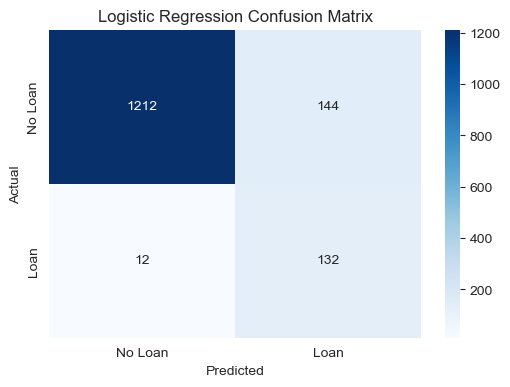

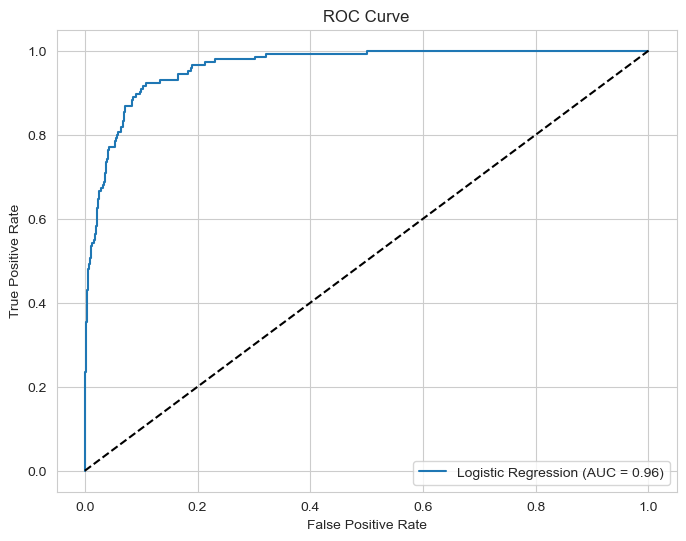


Logistic Regression Coefficients:
      Feature  Coefficient
3  CD Account     2.541586
0      Income     2.302071
2   Education     1.258754
4      Family     0.546700
1       CCAvg     0.433630
5    Mortgage     0.075942

=== DECISION TREE CLASSIFIER ===

Best Parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Accuracy: 0.9853333333333333
ROC AUC Score: 0.9979002785971812

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.95      0.93       144

    accuracy                           0.99      1500
   macro avg       0.95      0.97      0.96      1500
weighted avg       0.99      0.99      0.99      1500



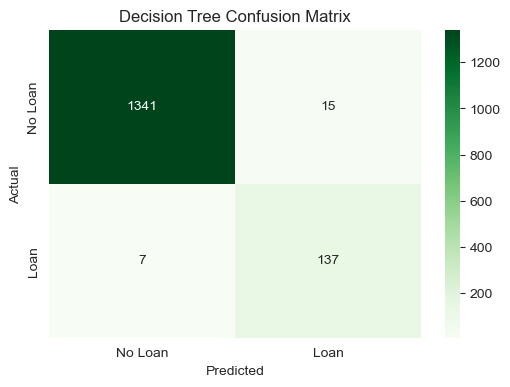

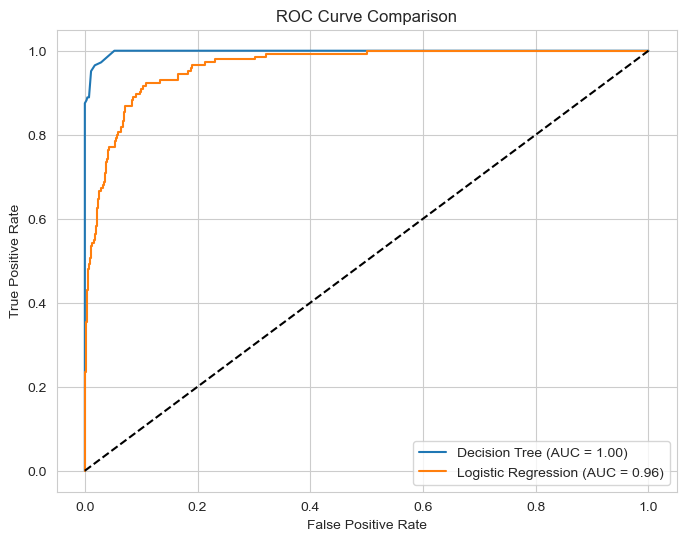


Decision Tree Feature Importances:
      Feature  Importance
0      Income    0.460576
2   Education    0.334602
4      Family    0.142704
1       CCAvg    0.051092
3  CD Account    0.011025
5    Mortgage    0.000000


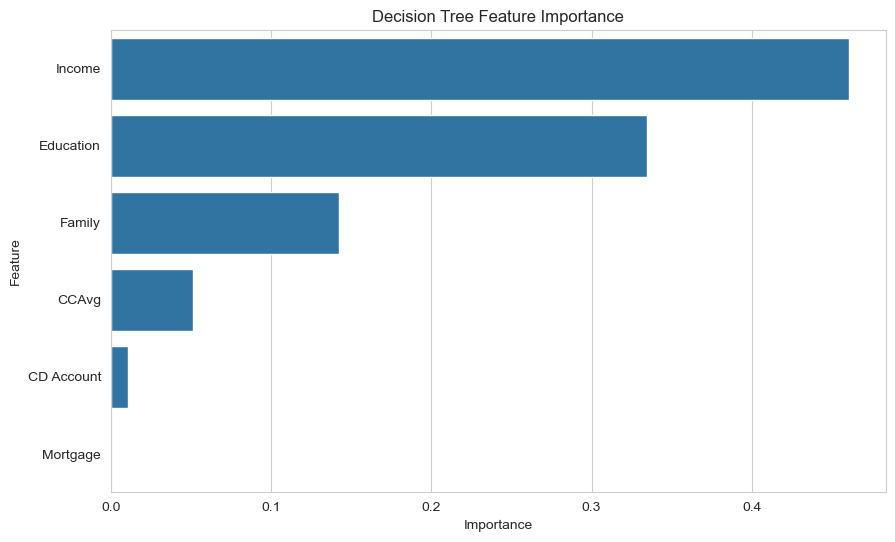


=== MODEL COMPARISON ===
Metric               Logistic Regression  Decision Tree       
Accuracy             0.8960               0.9853              
ROC AUC              0.9625               0.9979              


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_auc_score, 
                           roc_curve, precision_recall_curve)
from sklearn.model_selection import GridSearchCV

# Load and prepare data
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)

# Feature selection based on EDA results
# We'll use the most significant features identified in previous analysis
features = ['Income', 'CCAvg', 'Education', 'CD Account', 'Family', 'Mortgage']
X = df[features]
y = df['Personal Loan']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                   random_state=42, 
                                                   stratify=y)

# Standardize numerical features
scaler = StandardScaler()
num_cols = ['Income', 'CCAvg', 'Mortgage']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model 1: Logistic Regression
print("\n=== LOGISTIC REGRESSION ===")
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train, y_train)

# Predictions
y_pred_log = logreg.predict(X_test)
y_pred_proba_log = logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Loan', 'Loan'],
            yticklabels=['No Loan', 'Loan'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_log):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
logreg_coef = pd.DataFrame({'Feature': features, 
                           'Coefficient': logreg.coef_[0]})
logreg_coef = logreg_coef.sort_values('Coefficient', ascending=False)
print("\nLogistic Regression Coefficients:")
print(logreg_coef)

## Model 2: Decision Tree Classifier
print("\n=== DECISION TREE CLASSIFIER ===")

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Predictions
y_pred_dt = best_dt.predict(X_test)
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), 
            annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Loan', 'Loan'],
            yticklabels=['No Loan', 'Loan'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_proba_dt):.2f})')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_log):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Feature Importance
dt_importance = pd.DataFrame({'Feature': features, 
                            'Importance': best_dt.feature_importances_})
dt_importance = dt_importance.sort_values('Importance', ascending=False)
print("\nDecision Tree Feature Importances:")
print(dt_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance)
plt.title('Decision Tree Feature Importance')
plt.show()

## Model Comparison
print("\n=== MODEL COMPARISON ===")
print(f"{'Metric':20} {'Logistic Regression':20} {'Decision Tree':20}")
print(f"{'Accuracy':20} {accuracy_score(y_test, y_pred_log):<20.4f} {accuracy_score(y_test, y_pred_dt):<20.4f}")
print(f"{'ROC AUC':20} {roc_auc_score(y_test, y_pred_proba_log):<20.4f} {roc_auc_score(y_test, y_pred_proba_dt):<20.4f}")